<img src="https://images.solecollector.com/complex/image/upload/c_fill,dpr_2.0,f_auto,fl_lossy,q_auto,w_800/kobe-mamba-day-generator_wnqh7c">
source [here](https://images.solecollector.com/complex/image/upload/c_fill,dpr_2.0,f_auto,fl_lossy,q_auto,w_800/kobe-mamba-day-generator_wnqh7c)

# Kobe Bryant Shots Analysis
### Author: Zhiyu Huang 
Complete this analysis Individually

#### Outline:
1. Getting Started.
    <br>
    1.1 Introduction
    <br>
    1.2 Required Libraries.
    <br>
    1.3 Data Set Source

2. Data collection and processing
    <br>
    2.1 Load and View Data
    <br>
    2.2 Processing the Data set
3. Data Exploration and Analysis.
    <br>
    3.1 Shot area exploration and analysis.
    <br>
    3.2 Action  exploration and analysis.
    <br>
    3.3 Remaining time exploration and analysis.
    <br>
4. Linear regression and Hypothesis Test
    <br>
    4.1 Null hypothesis
    <br>
    4.2 Linear regression with scikit-learn
    <br>
    4.3 Regression with Statsmodel
5. Prediction with Machine Learning
    <br>
    5.1 Prediction with train/test sets by using classification tree
6. Conclusion
    <br>
    6.1 Shot selection
    <br>
    6.2 Prediction of Kobe's shot

## 1. Getting Started 
### 1.1 Introduction:
Kobe Bryant, one of the greatest NBA player in the history. He played 20 years for the Los Angelers Lakers. He is in the third place of NBA all time scoring leader, 1 time MVP, 5 times NBA champions and 2 times NBA final MVP. And he is considered to be the second best shooting guard in the NBA history behind the another lagend Michael Jordan. In the game, Kobe can always make a lot of tough shots, which are always be considered as impossible shots. But what are the Kobe's favorite shooting area? When Kobe would start his attack mode and make the most shots? What factors might incluence his shooting in the game? Those are interesting questions. Recently, [Kaggle](https://www.kaggle.com/c/kobe-bryant-shot-selection) released the data of Kobe's shot in his 20 years NBA career. So in this project, I will mainly using this data to analyze Kobe's shot, and predict which shots tend to be successfullly go to the basket. Hopefully, after reading this project, you will have a better understanding of Kobe's shots.


### 1.2 Required Libraries
   1.Pandas: used for data display operation
   <br>
   2.Matplotlib - pyplot: used for plotting Pandas data into graphs and charts
   <br>
   3.scikit-learn - popular machine learning library
   <br>
   4.Seaborn: provides a high-level interface for graphics on top of Matplotlib
   <br>
   5.Numpy:  is the fundamental package for scientific computing with Python.
   <br>
   6.Statsmodels: used to calculate models and relative statistics with linear regression

In [561]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from pandas import Series, DataFrame
from sklearn import preprocessing
from statsmodels import api as sm
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

### 1.3 Dataset source
Thanks to Kaggle! The Datasets I used are the datas of all Kobe's shot from his 20 years NBA career. Which is found in [Kaggle](https://www.kaggle.com/) dataset and specifically in [here](https://www.kaggle.com/c/kobe-bryant-shot-selection).

## 2. Data collection and processing 
### 2.1 Load and View Data
Load .csv file and show the first 5 rows to get a sense of what is contained in the dataset.


In [563]:
#Read the data from the CSV file
kb_shot_table_temp= pd.read_csv("kobe-shot-data.csv")
kb_shot_table_temp.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


We start the exploration by using the basic Pandas facilities: describe().

In [564]:
kb_shot_table_temp.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


### 2.2 Processing the Dataset
Firstly,we have to check what are the the columns in the shot table, and check is there exist NaN value.

In [566]:
col = kb_shot_table_temp.columns.tolist()
#show all the columns in a more compact way
for i,col in enumerate(col):
    if i%3 ==0:
        #new line
        print(" ") 
    print(col," ", end=" ") 

 
action_type   combined_shot_type   game_event_id    
game_id   lat   loc_x    
loc_y   lon   minutes_remaining    
period   playoffs   season    
seconds_remaining   shot_distance   shot_made_flag    
shot_type   shot_zone_area   shot_zone_basic    
shot_zone_range   team_id   team_name    
game_date   matchup   opponent    
shot_id   

In [567]:
kb_shot_table_temp.isnull().any()

action_type           False
combined_shot_type    False
game_event_id         False
game_id               False
lat                   False
loc_x                 False
loc_y                 False
lon                   False
minutes_remaining     False
period                False
playoffs              False
season                False
seconds_remaining     False
shot_distance         False
shot_made_flag         True
shot_type             False
shot_zone_area        False
shot_zone_basic       False
shot_zone_range       False
team_id               False
team_name             False
game_date             False
matchup               False
opponent              False
shot_id               False
dtype: bool

Based on the above outputs, we can notice that there is a shot_made_flag category in the whole dataset, and if the value of the shot_made_flag is 1 mean Bryant scored in this shot, otherwise if the value is 0 means he failed to score in this shot. but there is a null value in the shot_made_flag column. Since the null shot_made_flag value is not useful for our analysis, so we have to drop all the null value in the shot_made_flag column.

In [569]:
#clean the dataset
#drop the data which contains null value for shot_made_flas
kb_shot_table_ct = kb_shot_table_temp.dropna(subset=['shot_made_flag'])
kb_shot_table_ct.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [570]:
kb_shot_table_ct["minutes_remaining"].describe()

count    25697.000000
mean         4.886796
std          3.452475
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: minutes_remaining, dtype: float64

In [571]:
kb_shot_table_ct["seconds_remaining"].describe()

count    25697.000000
mean        28.311554
std         17.523392
min          0.000000
25%         13.000000
50%         28.000000
75%         43.000000
max         59.000000
Name: seconds_remaining, dtype: float64

Besides, based on the above results, we can notice that there is another column named minutes_remaining and in the table and it takes value from 0 to 11, as we know that in the normal NBA game, there are 4 quaters and each quater has 12 minutes(For reference you cam view [here](https://www.livestrong.com/article/339787-length-of-basketball-games/)), so the column minutes_remaining denotes the time in terms of minutes remaining until the end of each quater. And there is another column named seconds_remaining, it ranges from 0 to 59, it denotes the time remaining in termns of seconds until the end of each quater. So we combine those two columns to a new column named time_remaining in terms of seconds until the end of each quater.

In [573]:
#Make a new list to contain the time remaining by calculating based on the minutes remaing and seconds remaining.
list1 = kb_shot_table_ct.minutes_remaining *60+kb_shot_table_ct.seconds_remaining
temp_time = pd.DataFrame(list1,columns=(['time_remaining']))
kb_shot_table = pd.concat([kb_shot_table_ct, temp_time], axis=1, sort=False)
#The new dataframe of the shot data.
kb_shot_table.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,time_remaining
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,622
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,465
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,412
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,379
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,572


In [574]:
kb_shot_table.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,time_remaining
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946,321.519321
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397,208.311076
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,0.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000,141.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000,304.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000,499.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,714.000000


So now we have the a clean data set, which contains all the meaningful and useful data for our further analysis and hypothesis test, so now we move to the next step: Data exploration and Analysis.

## 3. Data Exploration and Analysis
### 3.1 Shot Zone Exploration and Analysis.
When we think about shooting the basketball, where we shoot is a very important question. Should I shoot in the 3-point line or in the free throw line? So the shooting area is a very crucial factor for shot selection, what shooting area in the court is Kobe's favorite? and which area he made most successful shots? so in this part, we will mainly explore and make a analysis of Kobe's shot zone. 

In [575]:
print(kb_shot_table['shot_zone_area'].unique())
print(kb_shot_table['shot_zone_basic'].unique())
print(kb_shot_table['shot_zone_range'].unique())

['Left Side(L)' 'Left Side Center(LC)' 'Right Side Center(RC)' 'Center(C)'
 'Right Side(R)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
['8-16 ft.' '16-24 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


As the output showned above, we noticed that there are those different shot_zone for Kobe's shot. In order to get the further analysis, we want have to know the percentage distribusion of different shot zone and what shotting zone has the most number of success shot(shot_made_flag is 1). So firstly, we use the pie plot to explore the percentage of distinct shot zone percentage for Kobe's shot.

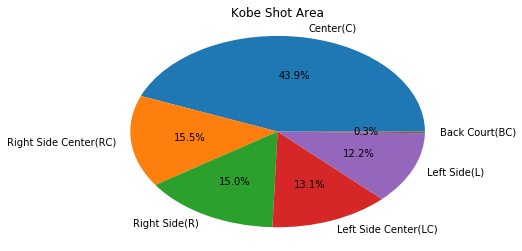

In [576]:
pie_chart = kb_shot_table['shot_zone_area'].value_counts().plot(kind='pie', title = "Kobe Shot Area", autopct='%1.1f%%', radius = 1.1)
pie_chart.set_ylabel('')
pie_chart

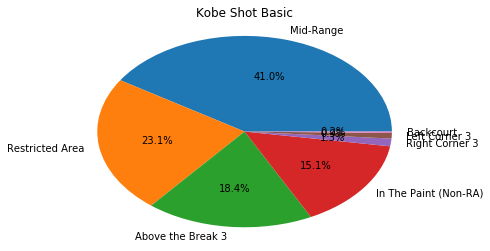

In [577]:
pie_chart = kb_shot_table['shot_zone_basic'].value_counts().plot(kind='pie', title = "Kobe Shot Basic", autopct='%1.1f%%', radius = 1.1)
pie_chart.set_ylabel('')
pie_chart

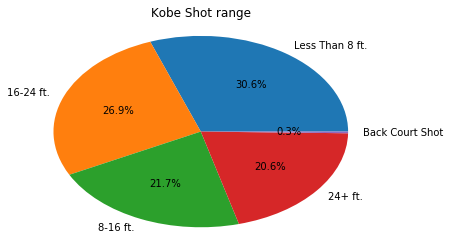

In [578]:
pie_chart = kb_shot_table['shot_zone_range'].value_counts().plot(kind='pie', title = "Kobe Shot range", autopct='%1.1f%%', radius = 1.1)
pie_chart.set_ylabel('')
pie_chart

As the above three plots showned, we get the distribusion of Kobe's shot zone. Those plots are based on the total number of shots Kobe made in the different area.We have not consider the successful shot in this moment,but we can make a guess based on the above plots, which is that Kobe really prefer the mid-range shot and he made most of his shots in the center area. And now in order to verify our guess, we have to compare the number of success shots he made in different areas, we will firstly use the bar plot to count the sucessful shot rate he made in different areas, and then we will use more intuitive scatter plot to show his succesfull shot by different areas.

               shot_area  successful_shot_rate  unsuccessful_shot_rate
0           Left Side(L)              0.396871                0.603129
1   Left Side Center(LC)              0.361177                0.638823
2  Right Side Center(RC)              0.382567                0.617433
3              Center(C)              0.525556                0.474444
4          Right Side(R)              0.401658                0.598342
5         Back Court(BC)              0.013889                0.986111


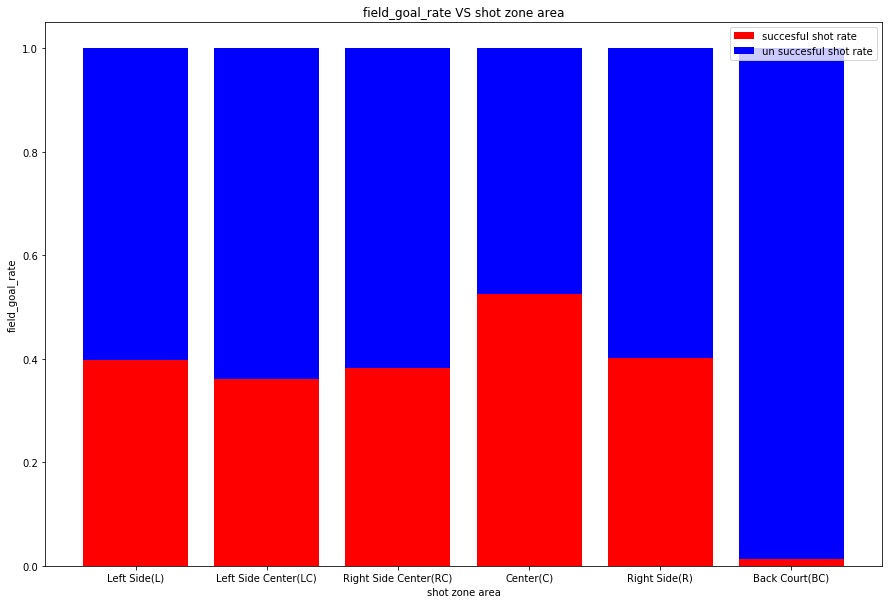

In [580]:
#Firstly, we explore the shot zone area.
shot_area = kb_shot_table['shot_zone_area'].unique()
#The helper function to count the successful shot rate and unsuccessful shot rate
def count_shots(data,col):
    succesful_r_list = []
    unsuccessful_r_list = []
    for ele in data:
        temp = kb_shot_table.loc[kb_shot_table[col] == ele]
        temp1 = temp.loc[temp['shot_made_flag'] == 1]
        #The succesful shot rate is the number of succesful shot / total number of shots
        succesful_shot_rate = len(temp1)/len(temp)
        unsuccesful_shot_rate = 1 - succesful_shot_rate
        succesful_r_list.append(succesful_shot_rate)
        unsuccessful_r_list.append(unsuccesful_shot_rate)
    frequencytable = pd.DataFrame(data,columns=(['shot_area']))
    frequencytable['successful_shot_rate'] = succesful_r_list
    frequencytable['unsuccessful_shot_rate'] = unsuccessful_r_list
    return frequencytable
result = count_shots(shot_area,'shot_zone_area')
print(result)
plt.figure(figsize=(15,10))
l1 = result['successful_shot_rate']
l2 = result['unsuccessful_shot_rate']
#we use color red to denote the succesful shot rate
#and we use color blue to denote the unsuccessful shot rate
p1 = plt.bar(shot_area, l1, width=0.8, label='succ', color='red')
p2 = plt.bar(shot_area, l2, width=0.8, label='unsucc', color='blue',bottom=l1)
plt.xlabel('shot zone area')
plt.ylabel('field_goal_rate')
plt.title('field_goal_rate VS shot zone area')
plt.legend((p1[0], p2[0]), ('succesful shot rate', 'un succesful shot rate'))
plt.show()

               shot_area  successful_shot_rate  unsuccessful_shot_rate
0              Mid-Range              0.406286                0.593714
1        Restricted Area              0.618004                0.381996
2  In The Paint (Non-RA)              0.454381                0.545619
3      Above the Break 3              0.329237                0.670763
4         Right Corner 3              0.339339                0.660661
5              Backcourt              0.016667                0.983333
6          Left Corner 3              0.370833                0.629167


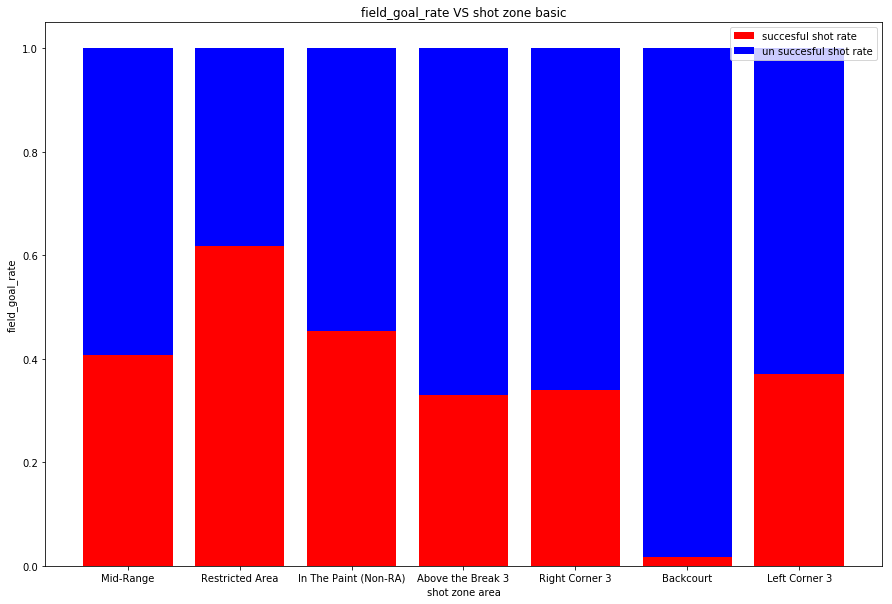

In [583]:
#Then we analyze the shot area basic column
#Kobe made in terms of type(mid range, the paint)
shot_area_ba = kb_shot_table['shot_zone_basic'].unique()
result = count_shots(shot_area_ba,'shot_zone_basic')
print(result)
plt.figure(figsize=(15,10))
l1 = result['successful_shot_rate']
l2 = result['unsuccessful_shot_rate']
p1 = plt.bar(shot_area_ba, l1, width=0.8, label='succ', color='red')
p2 = plt.bar(shot_area_ba, l2, width=0.8, label='unsucc', color='blue',bottom=l1)
#we use color red to denote the succesful shot rate
#and we use color blue to denote the unsuccessful shot rate
plt.xlabel('shot zone area')
plt.ylabel('field_goal_rate')
plt.title('field_goal_rate VS shot zone basic')
plt.legend((p1[0], p2[0]), ('succesful shot rate', 'un succesful shot rate'))
plt.show()

         shot_area  successful_shot_rate  unsuccessful_shot_rate
0         8-16 ft.              0.435484                0.564516
1        16-24 ft.              0.401766                0.598234
2  Less Than 8 ft.              0.573120                0.426880
3          24+ ft.              0.332513                0.667487
4  Back Court Shot              0.013889                0.986111


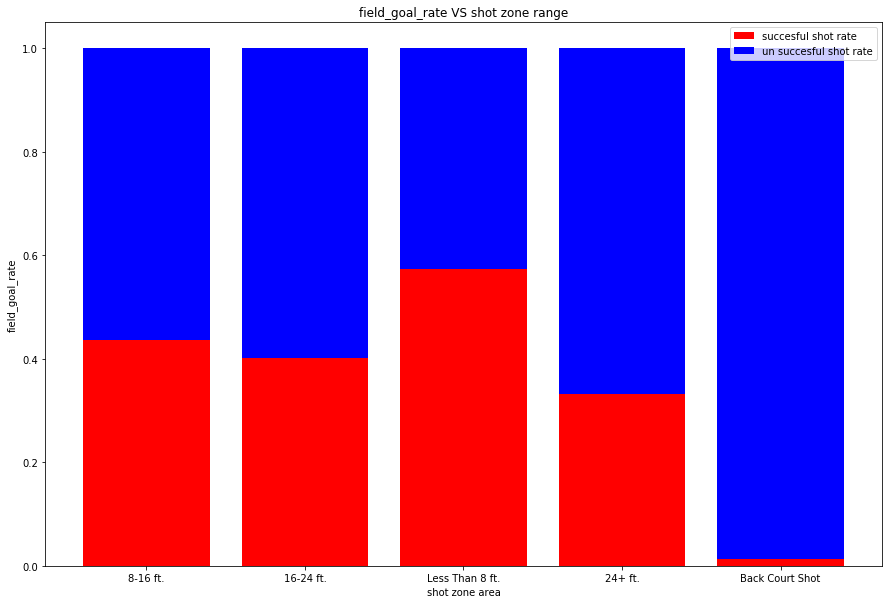

In [584]:
#Then we analyze the shot area range column
shot_area_r = kb_shot_table['shot_zone_range'].unique()
result = count_shots(shot_area_r,'shot_zone_range')
print(result)
plt.figure(figsize=(15,10))
l1 = result['successful_shot_rate']
l2 = result['unsuccessful_shot_rate']
p1 = plt.bar(shot_area_r, l1, width=0.8, label='succ', color='red')
p2 = plt.bar(shot_area_r, l2, width=0.8, label='unsucc', color='blue',bottom=l1)
#we use color red to denote the succesful shot rate
#and we use color blue to denote the unsuccessful shot rate
plt.xlabel('shot zone area')
plt.ylabel('field_goal_rate')
plt.title('field_goal_rate VS shot zone range')
plt.legend((p1[0], p2[0]), ('succesful shot rate', 'un succesful shot rate'))
plt.show()

Based on the above bar plot, Kobe has a very high succesful shot rate in a range less than 8 ft from the basket and in the center area of the court. And he has high field goal percentage in the restriceted area and paint area, which are closer from the basket. He prefer to shoot the succesful shot in the right side center rather than the left side center. And the succcessful rate for the back court shot is very low, which is reasonable, since make a success shot in the back court(which is far away from the basket) is really tough and rare in the normal game. Now, we try to plot those succesful shot plot by different areas in a more intuitive way.

Firstly, we plot all Kobe's shooting point including successed shots and failed shots.

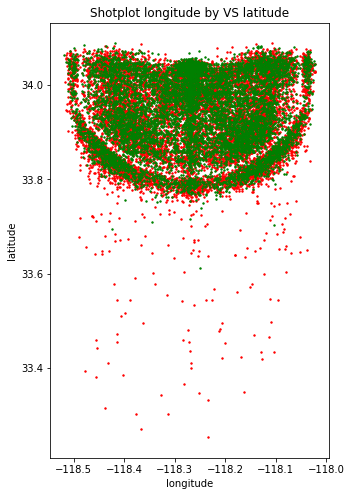

In [585]:
#make a new plot 
plt.figure(figsize=(5,8))
succ_shot = kb_shot_table.loc[kb_shot_table['shot_made_flag'] == 1]
unsucc_shot = kb_shot_table.loc[kb_shot_table['shot_made_flag'] == 0]
#And for the successful shot, we use the color green
#And for the unsuccessful shot, we use the color red
plt.scatter(x = unsucc_shot.lon, y = unsucc_shot.lat,color = 'red',s = 2)
plt.scatter(x = succ_shot.lon, y = succ_shot.lat,color = 'green', s = 2)
plt.title('Shotplot longitude by VS latitude')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

Based on the above plot, we can notice that Kobe is able to shoot and score in the whole half court. And most of his shot in the place where far away from three pointer line(latitue less than 33.6) are unseccessful. But this plot is not clear enough to observe the shooting area, so we try to make another 3 plots with successful shots, which are based on the shot_zone_area, shot_zone_basic and shot_zone range seperately.

The area Left Side(L) is color red
The area Left Side Center(LC) is color blue
The area Right Side Center(RC) is color green
The area Center(C) is color purple
The area Right Side(R) is color black
The area Back Court(BC) is color cyan


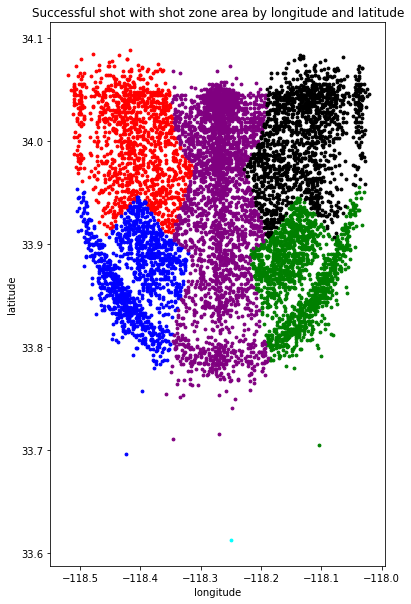

In [586]:
#Fistly, we plot the shot zone area
plt.figure(figsize=(6,10))
index = 0
#make a color list in order to scatter different areas in different colors
color_list =['red','blue','green','purple','black','cyan']
while index < len(shot_area):
    temp = kb_shot_table.loc[kb_shot_table['shot_zone_area'] == shot_area[index]]
    #In this plot, we consider those successful shots.
    succ_shot_temp = temp.loc[temp['shot_made_flag'] == 1]
    plt.scatter(x = succ_shot_temp.lon,y = succ_shot_temp.lat, color = color_list[index],s = 8)
    print("The area",shot_area[index] ,"is color",color_list[index])
    index = index + 1
plt.title('Successful shot with shot zone area by longitude and latitude')
plt.xlabel("longitude")
plt.ylabel("latitude")  
plt.show()

The area basic Mid-Range is color darkorange
The area basic Restricted Area is color purple
The area basic In The Paint (Non-RA) is color green
The area basic Above the Break 3 is color red
The area basic Right Corner 3 is color black
The area basic Backcourt is color cyan
The area basic Left Corner 3 is color darkblue


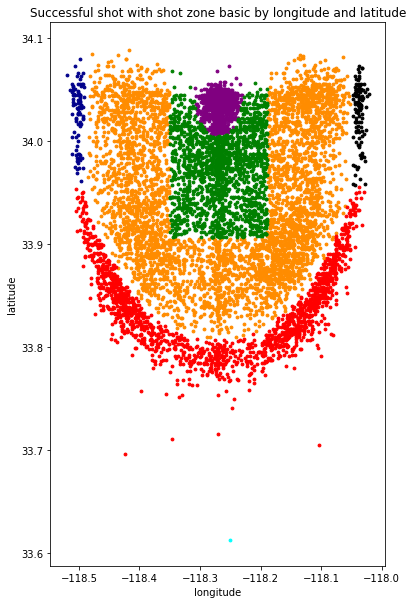

In [587]:
#Then we plot the shot zone basic
plt.figure(figsize=(6,10))
index = 0
#make a color list in order to scatter different areas in different colors
color_list =['darkorange','purple','green','red','black','cyan','darkblue']
while index < len(shot_area_ba):
    temp = kb_shot_table.loc[kb_shot_table['shot_zone_basic'] == shot_area_ba[index]]
    #In this plot, we consider those successful shots.
    succ_shot_temp = temp.loc[temp['shot_made_flag'] == 1]
    plt.scatter(x = succ_shot_temp.lon,y = succ_shot_temp.lat, color = color_list[index],s = 8)
    print("The area basic",shot_area_ba[index] ,"is color",color_list[index])
    index = index + 1
plt.title('Successful shot with shot zone basic by longitude and latitude')
plt.xlabel("longitude")
plt.ylabel("latitude")  
plt.show()

The area 8-16 ft. is color green
The area 16-24 ft. is color blue
The area Less Than 8 ft. is color purple
The area 24+ ft. is color black
The area Back Court Shot is color red


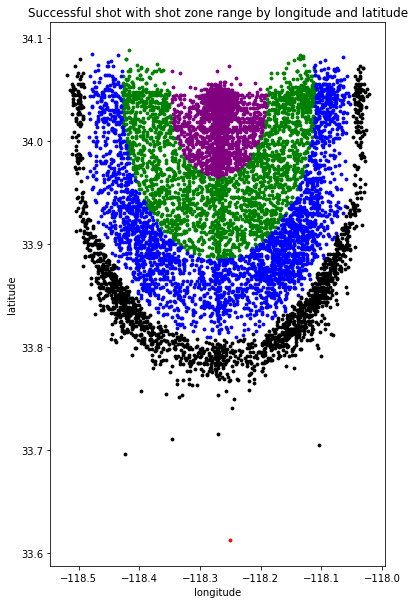

In [588]:
#Fistly, we plot the shot zone area
plt.figure(figsize=(6,10))
index = 0
#make a color list in order to scatter different areas in different colors
color_list =['green','blue','purple','black','red']
while index < len(shot_area_r):
    temp = kb_shot_table.loc[kb_shot_table['shot_zone_range'] == shot_area_r[index]]
    succ_shot_temp = temp.loc[temp['shot_made_flag'] == 1]
    plt.scatter(x = succ_shot_temp.lon,y = succ_shot_temp.lat, color = color_list[index],s = 8)
    print("The area",shot_area_r[index] ,"is color",color_list[index])
    index = index + 1
plt.title('Successful shot with shot zone range by longitude and latitude')
plt.xlabel("longitude")
plt.ylabel("latitude")  
plt.show()

Based on the abore three plots, we can observe the shooting area more clearly and intuitively. Kobe made his shots mostly in the center area with the range of 0-24ft from the basket, which are made by mid-range shot, paint shot, and restricted area shot. For the 3-pointers, Kobe prefer to shoot on the above the break 3 area. And the 3-pointers he made in the corner three area(both right corner and left corner) are relatively less than he made in the above 3 area. Besides, we can observe that, Kobe's shooting area almost cover the whole half court, which means he is able to shoot and score in any places when he pass the half court. There is no offensive blind spot for Kobe. And based on those scatter plots and bar plots, we can verify our previous guess that Kobe really prefer the mid-range shot and he made most of his shots in the center area.

### 3.2 Shot type Exploration and Analysis
The action type is another important factor for shot selection. There are a lot of action type such as jump shot or dunk shot or layup shot. What action types are Kobe's favorite, and what action type he used to make most successful shots? In this part, we mainly explore and analyze the action type of Kobe's shot. 

In [589]:
print(kb_shot_table["combined_shot_type"].unique())

['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']


Firstly, we make a pie chart of all Kobe's shot type to have a general overview of the shot type percentage.

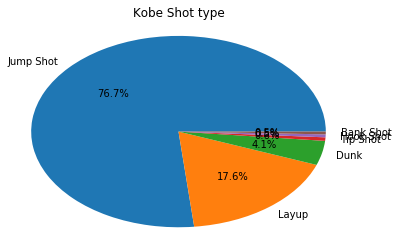

In [590]:
pie_chart = kb_shot_table['combined_shot_type'].value_counts().plot(kind='pie', title = "Kobe Shot type", autopct='%1.1f%%', radius = 1.1)
pie_chart.set_ylabel('')
pie_chart

Based on the above plot, Kobe has more jump shots than other action types, and next we explore the successful shot rate(field goal percentage) for each action type.

In [591]:
action_list = kb_shot_table["combined_shot_type"].unique()
#count the number of shot of each action type
num_shot_list = []
#The list to store the percentage of each action type in the total shots number
pencentage_list = []
#The list to store the number of successful shots in the coresponding action type
success_shot =[]
for ac in action_list:
    temp = kb_shot_table.loc[kb_shot_table["combined_shot_type"] == ac]
    made_temp = temp.loc[temp["shot_made_flag"] == 1]
    number_shots = len(temp)
    num_shot_list.append(number_shots)
    percentage = number_shots/(len(kb_shot_table))
    pencentage_list.append(percentage)
    number_success_shot = len(made_temp)
    success_shot.append(number_success_shot)
#Create a new table which contains all the action type and coresponding information
action_num = pd.DataFrame(action_list,columns=(['combined_shot_type']))
action_num["num_shots"] = num_shot_list
action_num['%_of_total_shot'] = pencentage_list
action_num['num_susccess_shot'] = success_shot
#Make a new column in the table to denote the field goal percentage of the coresponding action type
action_num['field_goal_percent'] = action_num['num_susccess_shot']/action_num["num_shots"] 
sorted_action_num = action_num.copy().sort_values('num_shots', ascending=False)
sorted_action_num

,combined_shot_type,num_shots,%_of_total_shot,num_susccess_shot,field_goal_percent
0,Jump Shot,19710,0.767016,7708,0.391071
2,Layup,4532,0.176363,2561,0.565093
1,Dunk,1056,0.041094,980,0.928030
3,Tip Shot,152,0.005915,53,0.348684
4,Hook Shot,127,0.004942,68,0.535433
5,Bank Shot,120,0.004670,95,0.791667


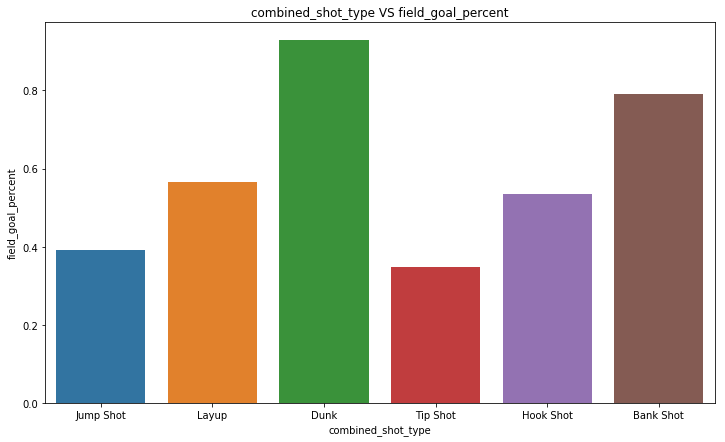

In [550]:
plt.figure(figsize=(12,7))
sns.barplot(x =sorted_action_num["combined_shot_type"], y=sorted_action_num['field_goal_percent'])
plt.xlabel("combined_shot_type")
plt.ylabel("field_goal_percent")
plt.title("combined_shot_type VS field_goal_percent")
plt.show()

Based on the above result, Kobe has a high field goal percentage on his dunk and bank shot.And relatively lower field goal percentage on his jump shot and tip shot.Then, we try to connect the shot type and Kobe's shooting area, which we analyze in the previous section, we can make a scatter plot to see that Kobe prefer to make successful jump shot in which area in the court, and successful layup shot in which area in the court.

The shot type Jump Shot is color green
The shot type Dunk is color blue
The shot type Layup is color purple
The shot type Tip Shot is color black
The shot type Hook Shot is color red
The shot type Bank Shot is color brown


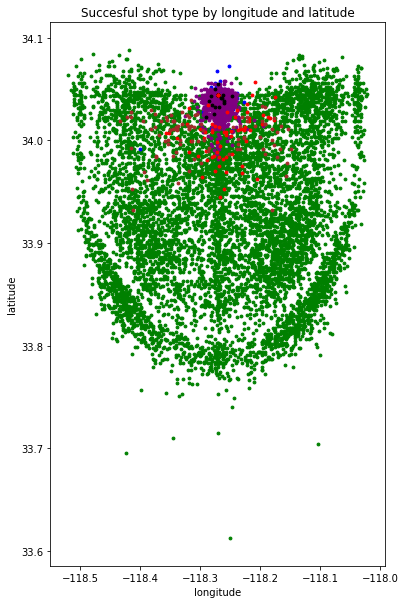

In [592]:
plt.figure(figsize=(6,10))
index = 0
#make a color list in order to scatter different areas in different colors
color_list =['green','blue','purple','black','red',"brown"]
combine_type_list = kb_shot_table["combined_shot_type"].unique()
while index < len(sorted_action_num):
    temp = kb_shot_table.loc[kb_shot_table['combined_shot_type'] == combine_type_list[index]]
    #Consider the successful shots in this part
    succ_shot_temp = temp.loc[temp['shot_made_flag'] == 1]
    plt.scatter(x = succ_shot_temp.lon,y = succ_shot_temp.lat, color = color_list[index],s = 8)
    print("The shot type",combine_type_list[index] ,"is color",color_list[index])
    index = index + 1
plt.title('Succesful shot type by longitude and latitude')
plt.xlabel("longitude")
plt.ylabel("latitude")  
plt.show()

Based on the above result, we can observe that, most of Kobe's shots are come from the Jump shots, it forms over 76% of his total shot, and then second most action type is layup shot, but the difference between the most and second most is very obvious, the second most action type make about 17.6% of all Kobe's shots, compare to the jump shots, it less more than 59%. More importantly, we can observe that the total number of jump shot and layup forms over 93% of all Kobe's shot, so the jump shot and layup shot are Kobe's two main shot type/attack method. And consider the field goal percentage, the dunk has the highest feild goal percentage, which over more than 92%, and the tip shot and jump shot has relatively lower field goal percentage, which are less than 40%. Besides, based on the scatter plot, Kobe like to make jump shot almost in any places except the restricted area in the court, most mid range shot and 3 point shot comes from jump shot, and most his successful shot from the restricted area and paint area(which are close from the basket) are come from layup shot, tip shot and dunk. In genreal, Kobe prefers jumps shot and layup shot, although his jump shot field goal percentage is not very high.

### 3.3 Remaining time exploration and analysis.
The remaining time is also a crucial factor for Kobe's shot, when the games is tied at the last second of the game, whether Kobe shoot at the last minute of the quater or last minute of the game? and whether Kobe can make successful shot in the last second of the game? In this section, we will explore and analyze the remaining time for the Kobe's shot.

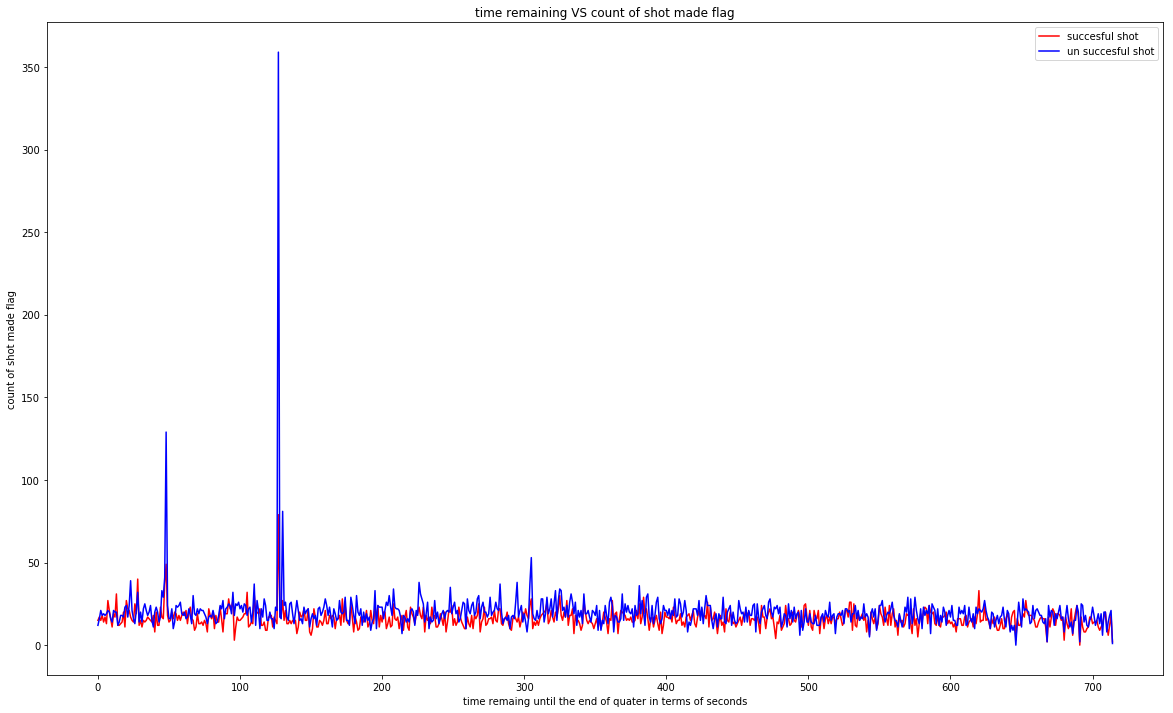

In [594]:
#Recall that the unit of our time remaining data is second.
re_time_list = kb_shot_table['time_remaining'].unique()
#And now we have to count the successful shot and unsuccesful shot in each remainning time.
s_shot_list = []
un_shot_list = []
for time in re_time_list:
    temp = kb_shot_table.loc[kb_shot_table["time_remaining"] == time]
    temp1 = temp.loc[temp["shot_made_flag"] == 1]
    temp2 = temp.loc[temp["shot_made_flag"] == 0]
    s_shot_list.append(len(temp1))
    un_shot_list.append(len(temp2))
plt.figure(figsize=(20,12))
#use color red to denote the succesful shot
p1 = plt.plot(s_shot_list,color = "red")
#use color blue to denote the unsuccesful shot
p2 = plt.plot(un_shot_list,color = "blue")
plt.legend((p1[0], p2[0]), ('succesful shot', 'un succesful shot'))
plt.xlabel("time remaing until the end of quater in terms of seconds")
plt.ylabel("count of shot made flag")
plt.title("time remaining VS count of shot made flag")
plt.show()

Based on the above plot, we can observe that there are some parts of red curve in the 0-100 value range of our x-axis, which means Kobe can make a shot even though the remaining time is very less. But Kobe has most of his unsuccessful shot from the remaining time in the range 100-200 seconds until the end of the quater. After looking at the above plot, we observe that Kobe has the ability to make a successful shot in the end of the quater or at the last seconds of the game. There are a lot of moments of buzzer beeter shot in Kobe's whole career.

## 4.Multiple linear regression and Hypothesis test
### 4.1 Null hypothesis

#### Null hypothesis: The shot selection(shot zone area, shot action type, remaining time) has no impact on shot made flag.
To test the null hypothesis, we will perform Multiple Linear Regression on the dataset using scikit-learn.

### 4.2 Linear regression with scikit-learn

We will make our linear regreesion model by using three attribute of shot selection, which are shot zone basic, combined shot types and remaining time, since the shot zone basic and combined shot types are those non-numeric values, so we have to transform those to numeric value first.So what I do is refer to this documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [595]:
#Transform the non-numeric data to numeric data
le = preprocessing.LabelEncoder()
shot_zone_list = le.fit_transform(kb_shot_table["shot_zone_basic"])
shot_type_list = le.fit_transform(kb_shot_table["combined_shot_type"])
remaining_time_list = kb_shot_table["time_remaining"]

In [596]:
X = np.column_stack((shot_zone_list,shot_type_list,remaing_time_list))
Y = kb_shot_table['shot_made_flag'].tolist()
reg = linear_model.LinearRegression()
#Make the multiple linear regression model
reg.fit(X,Y)
print(reg.fit(X,Y))
print('The Coefficient is: ', (reg.coef_))
print("The coefficient for shot zone is", float("4.28970879e-02"))
print("The coefficient for shot type is",float("-8.21551241e-02"))
value = float('3.78157282e-05')
remaining_time_coef = "%f" % value
print("The coefficient for remaining time is",remaining_time_coef)
print('The intercept is: ',(reg.intercept_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
The Coefficient is:  [ 4.28970879e-02 -8.21551241e-02  3.78157282e-05]
The coefficient for shot zone is 0.0428970879
The coefficient for shot type is -0.0821551241
The coefficient for remaining time is 0.000038
The intercept is:  0.5501894922316838


Since the shot made flag only has two value 0 and 1, and based on the coefficients we got above, the shot zone has the most impact for the shot made flag,since the coefficient of remaing time is relatively small, it has less impact on the shot made flag. And the shot type might has a negative impact on the shot made flag, we have to check in the further step. In order to find which factors actually have more meaningful impact on the shot made flag and to test the null hypothesis, we need to observe the p-values, so what we have to use is Statsmodels.

### 4.3 Regression with Statsmodel

Using the OLS model Fit and summary, what I do is refer to [here](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html)

In [597]:
OLS_model = sm.OLS(Y,X).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     6688.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        00:19:23   Log-Likelihood:                -18678.
No. Observations:               25697   AIC:                         3.736e+04
Df Residuals:                   25694   BIC:                         3.739e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0524      0.002     29.976      0.000       0.049       0.056
x2             0.0652      0.002     27.926      0.000       0.061       0.070
x3             0.0002   1.45e-05     12.232      0.000       0.000       0.000
==============================================================================
Omnibus:                      162.881   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3438.918
Skew:                           0.197   Prob(JB):                         0.00
Kurtosis:                       1.252   Cond. No.                         330.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the above result, we can find that the shot type indeed has positive impact on the shot made flag.Both shot area(x1) and shot type(x2) have impact on the shot made flag, and remaining time has relatively small impact on the shot made flag. Considering the hypothesis test, we move our eyes to the p-value column, which is the column of (P>|t|), since there are no one above a critical value 0.05, all the p-value are 0, which are well below the 0.05, which means they have significance within the model.

#### So, we reject the null hypothesis, because clearly, the shot selection(shot zone area, shot action type, remaining time) contributes to the shot made flag.

## 5. Predict shot made flag from shot selection with Machine Learning
In this section, I will reuse those X and Y value in the above section, and here we will split those inputs to the trains/test sets in order to train the classification tree model. And use the X_test set to predict the shot made flag, and compare those predicted shot made flag with Y_test, which is the actual shot made flag. So, in general, we make a model to predict whether Kobe can make a successful shot with given predictors.

### 5.1 Prediction with train/test sets by using classification tree
So firstly, we have to split our data to train and test sets, I will split 80% data for trainning and 20% data for testing.

In [603]:
#Make training and testing data from same X and Y in the above regression part
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)
#Create a new model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
print("The resulf of classification tree is",clf)

The resulf of classification tree is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [604]:
#Then predict the value by X_test set
predict_shot = clf.predict(X_test)
#Display first 100 predicted shot made flag and test shot made flag
print(predict_shot[0:100])
print(y_test[0:100])

[1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 1.]
[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]


Since the shot made flag value are all binary value, it is either 0 or 1,it is a little bit hard to visualize those data in a normal scatter or line plot. So we use an alternative way to visualize the predicted data and test data, and compare those two. Since those are binary value, so if the predicted value is correct, the difference between predicted value and test value should be 0, otherwise, the difference is either 1 or -1, so what we do first, it get the difference between the predicted value and test value, and then take the absolute value of each number in the list, so after taking the absolute value, if the difference is 0, which means the prediceted shot made flag is same with the test shot made flag; if the difference is 1, which means the predicted shot made flag is not the same with the test shot made flag.

In [605]:
#Make a new table to denote the comparisom
dif_table = pd.DataFrame(predict_shot,columns =(["pred_shot_flag"]))
dif_table["test_shot_flag"] = y_test
#calculate the difference
difference = [abs(x) for x in predict_shot - y_test]
dif_table['differ'] = difference
dif_table.head()

,pred_shot_flag,test_shot_flag,differ
0,1.0,1.0,0.0
1,1.0,0.0,1.0
2,0.0,1.0,1.0
3,0.0,1.0,1.0
4,1.0,1.0,0.0


And then, we use the pie chart to visualize the percentage of difference.

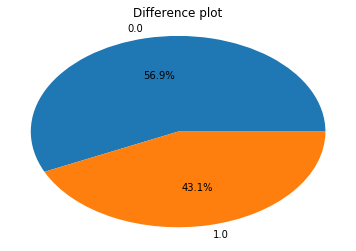

In [606]:
pie_chart = dif_table['differ'].value_counts().plot(kind='pie', title = "Difference plot", autopct='%1.1f%%', radius = 1.1)
pie_chart.set_ylabel('')
pie_chart

As we can see that we predict correct shot made flag about 57%, which is more than 50%, It is a good percentage for prediction of shots.(Since it only has two possibility: success or failed). 

In [607]:
print("Accuracy (scale of 0 to 1): {}".format(clf.score(X_test, y_test)))

Accuracy (scale of 0 to 1): 0.5690661478599222


So the accuracy is about 56.90%, it is not extremely high accuracy, but it is still a useful accuracy for predict Kobe's shot. After generating a model to predict Kobe's shot, we find that although we can predict Kobe's shot by those datas and model in some degree, there are also some factors which cannot be showned in forms of data may influence Kobe's shot, such as his mamba mentality and spirit,those factors cannot be denoted as data, but they can influence Kobe's shot in the NBA game, this will discussed further in section 6(conclusion part below)

## 6. Conclusion
###   6.1 Shot selection

From the section 3(Data exploration and analysis), we alredy know that Kobe's shot mostly comes from jump shot and layup shot, expecailly jump shot,which makes sence, since Kobe is a shooting guard. And his shooting range is very wide, Kobe is able to make a shot in any places when he pass the half court. He made most of his shot in the range 0-24 ft from the basket. Kobe loves mid-range shot, although his mid-range shot field goal percentage is less than his restricted area field goal percentage. Besides, Kobe will make shot when there is very less time until the quater ends or the game ends, and he is able to make some buzzer beeter shots. From the section 4(hypothesis test), we know that kobe's shot selection has impact on whether he can make the succesful shots although the remaining time has relatively small impact on the shot made flag.

### 6.2 Prediction of Kobe's shot

In section 5(Prediction with Machine Learning), we use the classification tree algorithm to generate the model to predict whether Kobe can make succesful shots by his shot selection(including shooting area basic, action type and remaining type), and the prediction accuracy of our model is about 56.90%, which is a useful accuracy rate, but not extremely high, I think this result is reasonable. As we already stated that the shot selection has impact on whether Kobe can make succesful shot, there are some factors such as his emotion, spirit and most importantly, his mamba mentality, those factors cannot denote by normal data. Kobe is always be considered as a emotional player in NBA, he is also a play who has strong willpower, for example, if the opponent inspires kobe's desire to attack, and inspire his emotion, he tend to knock down some really tough shots, even though by our model, those really tough shots will probably failed, but he can make it. So those factors also can impact Kobe's shots, this might explain why we got the 57% accuracy for predict Kobe's shot by using those shot selection data.

Thank you for reading my analysis! Hope you have better understanding about Kobe's shot. Any comments/criticisms of methodology, analysis, visualization, clarity of writing are warmly welcomed!